# Accuracy using Random Calssifier:

When random classifier is used for the calssification problem involving 5 output label, the probability of choosing correct label out of the 5 labels is (1/5) = 20%

So the accuracy will be almost equal to 20%.


# Accuracy using Majority Classifier:

When the majority calssifier is used, the majority label in the traning set is applied to all cross validation data set. So, the only the examples having the majority label will be correct using the Mojority classification model.
Here I'm considering the same split in data as Project part 1 (Training: 40000, Cross validation: 5000, Test: 5000)

In the given dataset, the training split of the data has majority label of 2.

Once this label is predicted for all validation set data, the accuracy = 1022/5000 = 0.20 = 20%

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import torch
from torch import autograd
import torch.nn.functional as F

#Prepare the data.
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn

dtype = torch.FloatTensor

images = np.load("./data/images.npy")
labels = np.load("./data/labels.npy")
images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))

images = images - images.mean()
images = images/images.std() 
train_seqs = images[0:40000]
val_seqs = images[40000:50000]

train_labels = labels[0:40000]
cv_labels = labels[40000:50000]

In [38]:
HEIGHT, WIDTH, NUM_CLASSES, NUM_OPT_STEPS = 26, 26, 5, 5000
learning_rate = 1

class LinearModel(torch.nn.Module):
    def __init__(self, D_in, D_out):
        super(LinearModel, self).__init__()
        #self.Linear = torch.nn.Linear(HEIGHT * WIDTH, NUM_CLASSES)
        self.Linear = torch.nn.Linear(D_in, D_out, bias = False)
    
    def forward(self, x):
        y_pred = self.Linear(x)
        return y_pred
        

# torch.Linear Parameters:
    In this case we have specified any bias while creating the Linear class constructor, so in the parameter number of biases = 0
    
    Number of weights created = 676 * 5 = 3380

In [39]:
model = LinearModel(HEIGHT * WIDTH, NUM_CLASSES)

# torch.optim:

In the previous homeworks, we have used, Stochastic Gradient Descent (SGD) and Adam variant of SGD.

Parameters required : TBD

In [40]:
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [41]:
def train(batch_size):
    model.train()
    
    i = np.random.choice(train_seqs.shape[0], size = batch_size, replace=False)
    x = Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    
    optimizer.zero_grad()
    y_hat = model(x)
    loss = F.cross_entropy(y_hat, y)
    loss.backward()
    optimizer.step()
    
    return loss.data[0]

In [42]:
def accuracy(y, y_hat):
    count = 0
    for i in range(y.shape[0]):
        if y[i] == y_hat[i]:
            count += 1
    return count/y.shape[0]

In [43]:
import random
def approx_train_accuracy():
    i = np.random.choice(train_seqs.shape[0], size = 1000, replace=False)
    x = train_seqs[i].astype(np.float32)
    y = train_labels[i].astype(np.int)
    #x =random.sample(range(0,40000),1000)
    #y = np.empty(1000)
    y_hat = np.empty(1000)
    
    index=0
    for param in model.parameters():
        weights = param.data.numpy()
        
    for i in range(1000):
        
        #x = train_seqs[i].astype(np.float32)
        #images_random = Variable(train_seqs[i].view(1,676), requires_grad=False)
        #y[index] = train_labels[i]
    
        #model.parameters()
        #y_pred = x.matmul(weights.t())
        y_pred = x[i].dot(weights.transpose())

        res = np.argmax(y_pred)
        #print(res)
        y_hat[i] = res
        #index += 1

    acc = accuracy(y,y_hat)
    #print(acc)
    return acc

def val_accuracy():
    #x =random.sample(range(0,10000),1000)
    #y = np.empty(1000)
    y_hat = np.empty(1000)

    i = np.random.choice(val_seqs.shape[0], size = 1000, replace=False)
    x = val_seqs[i].astype(np.float32)
    #print(x.shape)
    y = cv_labels[i].astype(np.int)
    #index=0

    for param in model.parameters():
        weights = param.data.numpy()     
    
    for i in range(1000):
        #x = val_seqs[i].astype(np.float32)
        #y[index] = cv_labels[i]
        
        y_pred = x[i].dot(weights.transpose())
        #y_pred = x.mm(model.parameters())

        res = np.argmax(y_pred)

        y_hat[i] = res
        #index += 1

    acc = accuracy(y,y_hat)
  
    return acc


In [44]:
train_accs, val_accs = [], []
batch_size = 500
for i in range(5000):
    l = train(batch_size)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

     0  0.54  0.56
   100  0.58  0.60
   200  0.64  0.67
   300  0.72  0.72
   400  0.68  0.67
   500  0.64  0.65
   600  0.67  0.64
   700  0.67  0.67
   800  0.70  0.69
   900  0.70  0.72
  1000  0.69  0.66
  1100  0.68  0.70
  1200  0.62  0.63
  1300  0.68  0.69
  1400  0.65  0.65
  1500  0.69  0.67
  1600  0.70  0.69
  1700  0.65  0.67
  1800  0.68  0.62
  1900  0.67  0.69
  2000  0.72  0.73
  2100  0.70  0.66
  2200  0.60  0.61
  2300  0.70  0.72
  2400  0.71  0.66
  2500  0.69  0.68
  2600  0.73  0.72
  2700  0.68  0.66
  2800  0.67  0.65
  2900  0.70  0.69
  3000  0.67  0.67
  3100  0.71  0.69
  3200  0.70  0.61
  3300  0.67  0.64
  3400  0.67  0.70
  3500  0.70  0.69
  3600  0.72  0.69
  3700  0.66  0.66
  3800  0.66  0.65
  3900  0.59  0.61
  4000  0.69  0.69
  4100  0.67  0.62
  4200  0.63  0.65
  4300  0.69  0.68
  4400  0.72  0.72
  4500  0.70  0.67
  4600  0.69  0.68
  4700  0.67  0.68
  4800  0.73  0.71
  4900  0.68  0.65
  5000  0.76  0.74
  5100  0.66  0.61
  5200  0.68

max_train accuracy:  0.755
max_val accuracy:  0.762


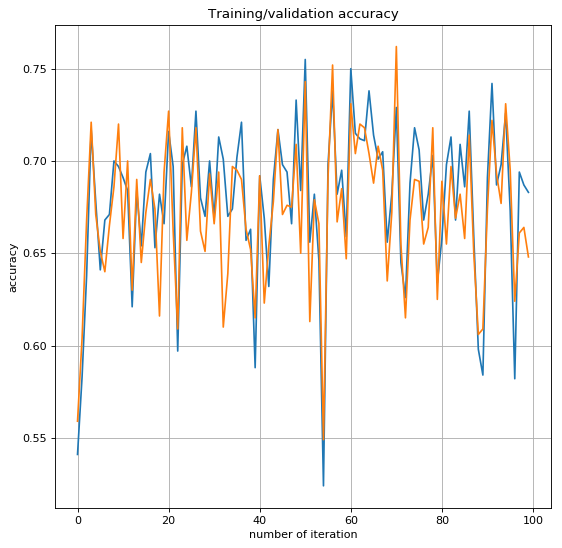

In [45]:
import matplotlib.pyplot as plt


t = np.arange(0,len(train_accs),1)

s = train_accs
k = val_accs
print("max_train accuracy: ", max(train_accs))
print("max_val accuracy: ", max(val_accs))
plt.figure(figsize=(8,8), dpi = 80)
plt.plot(t, s, t, k)

plt.xlabel('number of iteration')
plt.ylabel('accuracy')
plt.title('Training/validation accuracy')
plt.grid(True)
plt.show()

# Accuracies with batch size  =1 and 5000 steps:

With batch size =1, Optimization steps = 5000, using SGD and learning rate=1e-6, the highest accuracy reached is around 24%. 


Reason for low accuracy: The model is underfitting here. 

The learning is too less for the loss function to converge. There is significantly high loss in the predictions and weights are not optimal. So, the accuracy is very less.